# Practical 10

### Performance Metrics

In this practical class you will be asked to solve a problem about Classifying Electrocardiograms. 

## (1) Electrocardiograms

👇 Import the `electrocardiograms.csv` dataset and display its first 5 rows

In [6]:
import pandas as pd

data = pd.read_csv("electrocardiograms.csv")

data.tail()


,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
19560,1.000000,0.533333,0.049123,0.098246,0.108772,0.091228,0.101754,0.084211,0.105263,0.087719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19561,1.000000,0.564854,0.221757,0.202929,0.087866,0.000000,0.041841,0.150628,0.240586,0.290795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19562,0.991914,0.735849,0.215633,0.029650,0.061995,0.061995,0.016173,0.010782,0.021563,0.021563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19563,1.000000,0.839662,0.240506,0.215190,0.236287,0.198312,0.194093,0.143460,0.135021,0.071730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19564,0.934783,0.739130,0.335404,0.093168,0.096273,0.071429,0.027950,0.015528,0.009317,0.006211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


💓 Each observation of the dataset is a sequence of measured heartbeats, taken from a patient's electrocardiogram (ECG).

🎯 The target is binary and defines whether the heartbeat shows:
* a risk of cardiovascular disease 🔴 (1)
* or not 🟢 (0)

## (2) Data Exploration

❓ **Question** ❓

Plot an observation of each target class to get a visual idea of what the numbers represent.

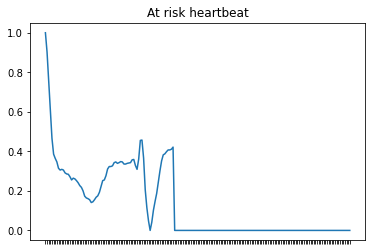

In [3]:
import matplotlib.pyplot as plt

plt.plot(data.iloc[1, :-1])
plt.tick_params(labelbottom=False)
plt.title('At risk heartbeat')
plt.show()

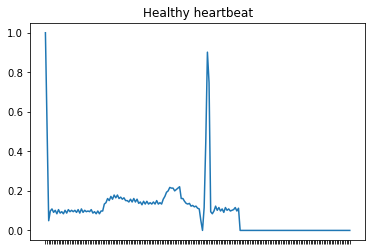

In [3]:
plt.plot(data.iloc[19560, :-1])
plt.tick_params(labelbottom=False)
plt.title('Healthy heartbeat')
plt.show()

❓ **Questions** ❓

* How many observations of at-risk heartbeats are there? Save your answer as `at_risk_count`.

In [4]:
at_risk_count = data.target.value_counts()[1]
at_risk_count

1448

* How many observations of healthy heartbeats are there? Save your answer as `healthy_count`.

In [5]:
healthy_count = data.target.value_counts()[0]
healthy_count

18117

In [6]:
round(data.target.value_counts(normalize = True),2)

0    0.93
1    0.07
Name: target, dtype: float64

👩🏻‍🏫 In certain cases, the class balance is representative of the true class distribution. This is the case here: the vast majority of people actually have healthy hearts. In such case, we preserve the class distribution to train the model based on reality, and adapt our modeling approach accordingly.

[Centers for Disease Control and Prevention - Heart Disease Facts](https://www.cdc.gov/heartdisease/facts.htm)

##  (3) Logistic Regression

🎯 Your task is to **flag heartbeats that are at risk of cardiovascular diseases.**

👇 Let's start by investigating the performance of a `LogisticRegression` on that task. Use a ***cross-validation to evaluate the model*** on the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Ready X and y
X = data.loc[:, 'x_1':'x_187']
y = data['target']


# 10-Fold Cross validate model
log_cv_results = cross_validate(LogisticRegression(max_iter=1000), 
                                X, y, 
                                cv=10, 
                                scoring=['accuracy','recall','precision','f1'])

log_cv_results["test_accuracy"].mean()
#log_cv_results["test_recall"].mean()
#log_cv_results["test_precision"].mean()
#log_cv_results["test_f1"].mean()

0.9390746917624634

❓ **Question (Ratio of correct predictions)** ❓ 

What is the ratio of correct predictions for this model ? Save your answer under variable name `correct_pred_ratio`.

In [8]:
correct_pred_ratio = log_cv_results['test_accuracy'].mean()
correct_pred_ratio

0.9390746917624634

❓ **Question (Ability to flag at-risk patients)** ❓ 

What percentage of at-risk heartbeats is the model able to flag? Save your answer under variable name `flag_ratio`.

In [9]:
flag_ratio = log_cv_results['test_recall'].mean()
flag_ratio

0.32938697318007665

❓ **Question (Ability to flag correctly)** ❓ 

When the model signals an at-risk heartbeat, how often is it correct? Save your answer under variable name `correct_detection_ratio`.

In [10]:
correct_detection_ratio = log_cv_results['test_precision'].mean()
correct_detection_ratio

0.6832685782552069

❓ **Question (Detecting as many at-risk patients as possible without too many false alarms)** ❓ 

What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?  Save your answer under variable name `aggregated_metric`.

In [11]:
aggregated_metric = log_cv_results['test_f1'].mean()
aggregated_metric

0.443460572263365

▶️ Run the following cell before moving on:

In [12]:
print(f"You should have noticed that the model was able to predict correctly in {int(round(correct_pred_ratio,2)*100)} cases out of 100. ")

print(f"However, it was able to capture only {round(flag_ratio,2)*100} % of the at-risk patients")

print("Why ? Let's print a confusion matrix!")


You should have noticed that the model was able to predict correctly in 94 cases out of 100. 
However, it was able to capture only 33.0 % of the at-risk patients
Why ? Let's print a confusion matrix!


## (4) Confusion Matrix

👇 Using `plot_confusion_matrix` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)),  visualize the predictions breakdown of the Logistic Regression model.

💡 Hints
    
1. [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)    
2. ['ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
    
- Don't forget to to go back to the **Holdout method** to [`train-test-split`]((https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) your dataset and look at the confusion matrix on the test set.  



--------------------------------------------------
Printing the confusion Matrix


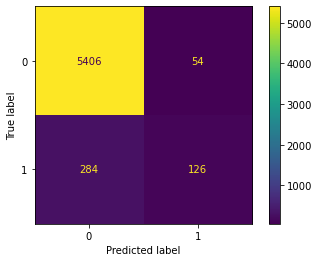

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# STEP 0 - Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# STEP 1 - Instantiate and train the model on the training data
log_model = LogisticRegression(max_iter=1000).fit(X_train,y_train)


# # STEP 2b - Predictions on the test set
y_pred = log_model.predict(X_test)

# STEP 2b - Plot the confusion matrix

print("-"*50)
print("Printing the confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=log_model.classes_
)

disp.plot()

ℹ️ The confusion matrix should show that the model is influenced by the class imbalance: it predicts the heartbeats to be healthy most of the time. Due to this behaviour, the model is often correct and has a **high accuracy**. However, this also causes it to miss out on many at-risk heartbeats: it has **bad recall**...

👉 This model is therefore poor at the task of **flagging at-risk observations**.

❗️ Don't be fooled by the accuracy and look at the metric that corresponds to your task! ❗️

If you look at the `normalize` argument in the official documentation of [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), you will see that you can:
- not mention it: the confusion matrix shows *True Positives* and *True Negatives* on the diagonal, *False Positives* and *False Negatives* on the anti-diagonal
- set it to `true` to normalize the confusion matrix row by row (focusing on the ability to capture each class, i.e. focusing on the recall)
- set it to `pred` to normalize the confusion matrix column by colun (focusing on the ability to avoid false alarms for each predicted class)


--------------------------------------------------
Printing the confusion Matrix focusing on the Recall - the ability to capture classes


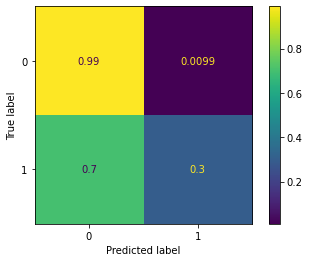

In [14]:
print("-"*50)
print("Printing the confusion Matrix focusing on the Recall - the ability to capture classes")
cm = confusion_matrix(y_test, y_pred,
                     normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_model.classes_)
disp.plot()

--------------------------------------------------
Printing the confusion Matrix focusing on the Precision - the ability to avoid false alarms


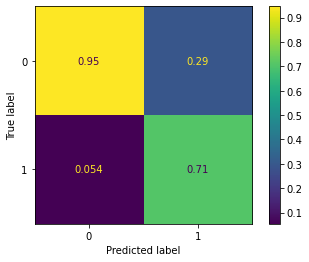

In [15]:
print("-"*50)
print("Printing the confusion Matrix focusing on the Precision - the ability to avoid false alarms")
cm = confusion_matrix(y_test, y_pred,
                     normalize = 'pred') 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_model.classes_)
disp.plot()

## (5) KNN Classifier

❓ **Question (Classification Model Selection)** ❓ 

Would a default KNN classifier perform better at the task of flagging at-risk observations?

Save the you answer under `best_model` as "KNN" or "LogisticRegression".

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# 10-Fold Cross validate model and evaluate recall
knn_cv_results = cross_validate(KNeighborsClassifier(n_neighbors=5), 
                                X, y, 
                                cv=10, 
                                scoring=['recall']) 

knn_score = knn_cv_results['test_recall'].mean()
print(knn_score)

best_model = "KNN"

0.8680507662835248


💪 For this ECG dataset, the KNN Classifier should have a much higher recall than the LogisticRegression and therefore is better suited for the task.

## (6) Prediction

❓ **Question (Predicting)** ❓

A patient `electrocardiograms_new_patient.csv` comes to you for a second opinion because  he was told that based on his heartbeats, this patient may be at-risk.  

According to your optimal model, is he at-risk or not?  

Save the prediction of your model under variable name `prediction` as "at risk" or "healthy".

In [17]:
#Import the electrocardiograms_new_patient.csv 
new_patient = pd.read_csv('electrocardiograms_new_patient.csv')
new_patient

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
knn_model = KNeighborsClassifier().fit(X,y) # Fit the model you have found to be optimal (Default KNN)

model_prediction = knn_model.predict(new_patient)[0] # Make prediction
print(model_prediction)

prediction = "at risk"

1
